## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox

## Load Dataset

In [2]:
data_train = 'C:/Users/user/OneDrive - University of Hertfordshire/Hamoye Internship/Animal Images Count/train'
data_test = 'C:/Users/user/OneDrive - University of Hertfordshire/Hamoye Internship/Animal Images Count/test'
data_validation = 'C:/Users/user/OneDrive - University of Hertfordshire/Hamoye Internship/Animal Images Count/validation'

## Preprocessing for training, validation, and test sets

In [3]:
#data_train = tf.keras.utils.image_dataset_from_directory( data_train, 
                                                        # image_size=(180, 180), 
                                                        # batch_size=32,
                                                        #shuffle=True,
                                                       # validation_split= False)

data_train = tf.keras.utils.image_dataset_from_directory(data_train, image_size=(180, 180), batch_size= 32, shuffle=True, validation_split=False)

Found 1332 files belonging to 4 classes.


In [4]:
data_validation = tf.keras.utils.image_dataset_from_directory(data_validation, 
                                                              image_size=(180, 180), 
                                                              batch_size= 32, 
                                                              shuffle=True,
                                                              validation_split=False)

Found 88 files belonging to 4 classes.


In [5]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test,
                                                    image_size=(180, 180),
                                                      batch_size=32,
                                                      shuffle=True,
                                                      validation_split=False)

Found 84 files belonging to 4 classes.


In [7]:
data_cat = data_train.class_names
data_cat

['Buffalo', 'Elephant', 'Rhino', 'Zebra']

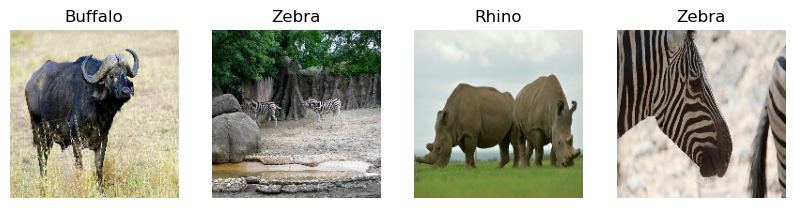

In [10]:
plt.figure(figsize=(10,10,))
for image, labels in data_train.take(1):
    for i in range(4):
        plt.subplot(1,4,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

## Build the Model

In [11]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])



In [12]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


## Train the Model

In [13]:
history = model.fit(data_train, validation_data=data_validation, epochs= 10)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 19s 378ms/step - accuracy: 0.3408 - loss: 1.9261 - val_accuracy: 0.4886 - val_loss: 1.1222
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 17s 376ms/step - accuracy: 0.5811 - loss: 0.9617 - val_accuracy: 0.6136 - val_loss: 0.8845
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 17s 386ms/step - accuracy: 0.7287 - loss: 0.7377 - val_accuracy: 0.6932 - val_loss: 0.7406
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 18s 399ms/step - accuracy: 0.7736 - loss: 0.5749 - val_accuracy: 0.7614 - val_loss: 0.7810
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 17s 375ms/step - accuracy: 0.8605 - loss: 0.3842 - val_accuracy: 0.7386 - val_loss: 0.7993
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 16s 367ms/step - accuracy: 0.8989 - loss: 0.2862 - val_accuracy: 0.7273 - val_loss: 0.7715
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 459ms/step - accuracy: 0.9381 - loss: 0.1890 - val_accuracy: 0.7386 - val_loss: 0.9258
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 26s 543ms/step - accuracy: 0.9634 - loss: 0.1257 - val_accu

## Evaluate the model

In [14]:

loss1, accuracy1 = model.evaluate(data_train)
loss, accuracy = model.evaluate(data_validation)
print(f'Validation Accuracy: {accuracy*100:f}.2%')
print(f'Training Accuracy: {accuracy1*100:.2f}%')


42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - accuracy: 0.9951 - loss: 0.0379
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.7234 - loss: 1.1329
Validation Accuracy: 70.454544.2%
Training Accuracy: 99.47%


In [13]:
from tensorflow.keras.metrics import Precision, Recall

In [14]:
pre = Precision()
Re = Recall()

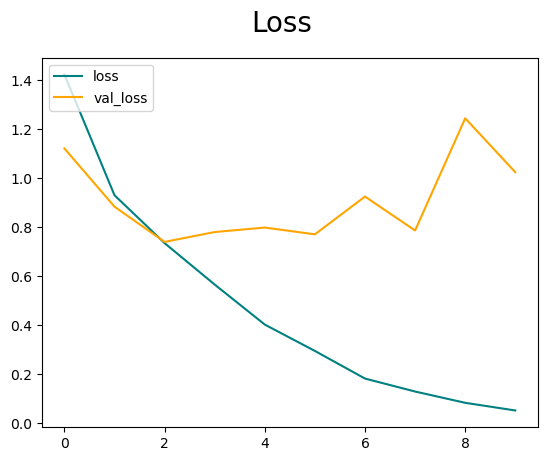

In [15]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

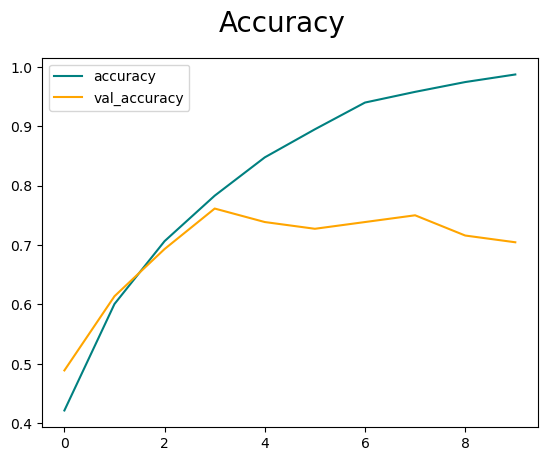

In [16]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Test the Model 

In [24]:
test_image = "002.jpg"

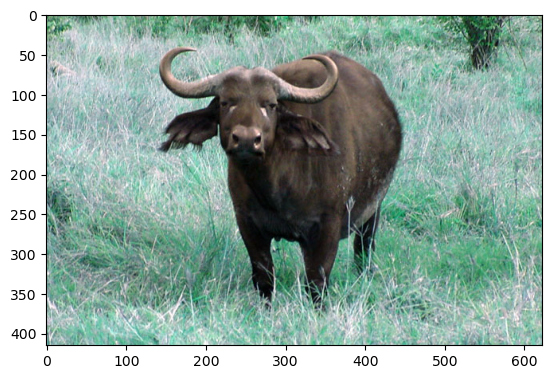

In [25]:

img = cv2.imread(test_image)
plt.imshow(img)
plt.show()

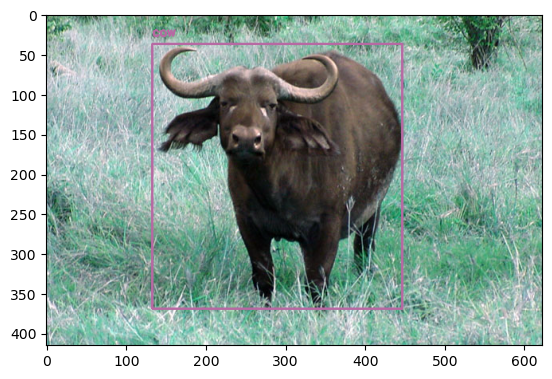

In [26]:
box, label, count = cv.detect_common_objects(img)
output = draw_bbox(img, box, label, count)
plt.imshow(output)
plt.show()

In [27]:
image = test_image
image = tf.keras.utils.load_img(image, target_size=(180,180))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [28]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


In [29]:
score = tf.nn.softmax(predict)

In [30]:
print('Animal in the image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))
print('Number of animals in the image:' + str(len(label)))

Animal in the image is Buffalo with accuracy of 99.93
Number of animals in the image:1


In [24]:
#model.save('Image_counts.keras')